<a href="https://colab.research.google.com/github/varnikaraj/Breast-cancer-detection-using-DL/blob/main/Breastcacer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install required libraries
!pip install tensorflow matplotlib scikit-learn


In [ ]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Set path
data_path = '/content/drive/MyDrive/Breast_Cancer_Dataset'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = '/content/drive/MyDrive/Breast_Cancer_Dataset'

img_size = (150, 150)

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1263 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,141,827 (114.98 MB)

 Trainable params: 6,554,115 (25.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1263 images belonging to 3 classes.
Classes in this batch: ['benign', 'malignant', 'normal']


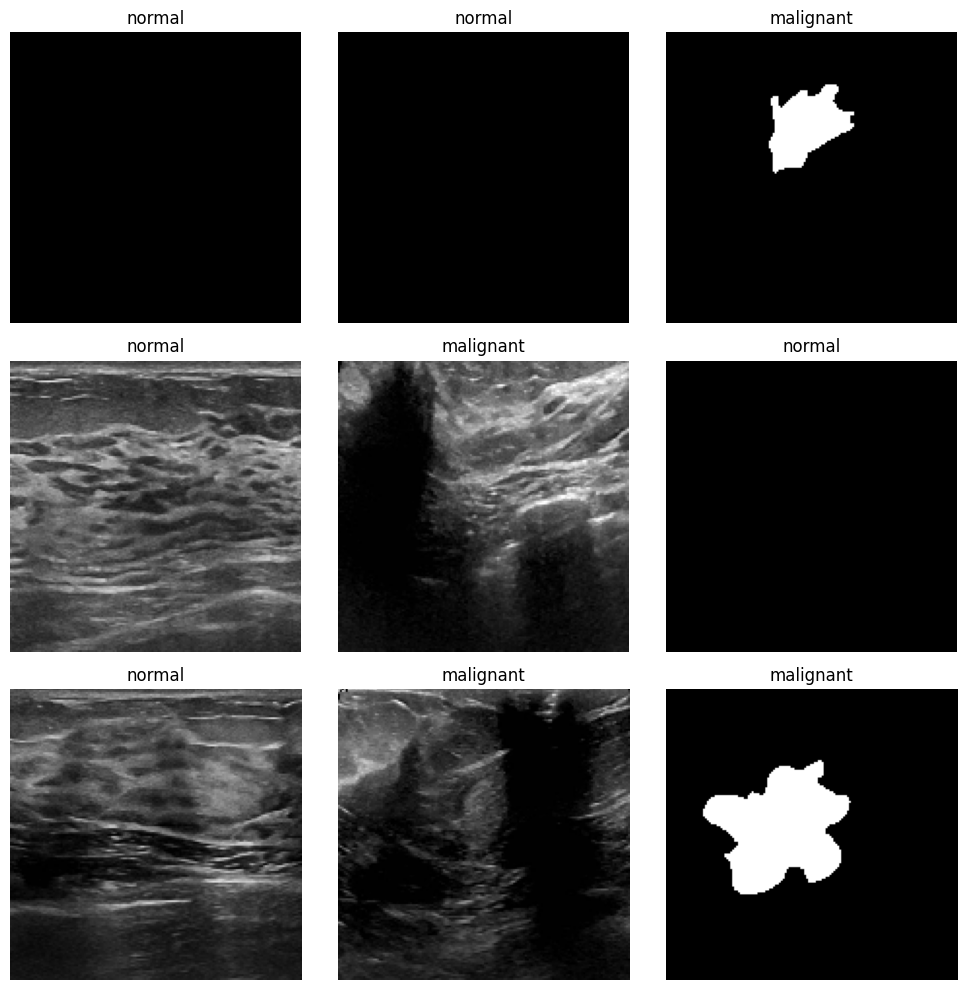

In [ ]:
# Create ImageDataGenerator with augmentation and shuffle enabled
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True  # Ensure batches are randomly shuffled
)

# Get class names
class_names = list(train_data.class_indices.keys())

# Get a batch of images and labels
images, labels = next(train_data)

# Check which classes are in this batch
unique_labels = np.unique(np.argmax(labels, axis=1))
print("Classes in this batch:", [class_names[i] for i in unique_labels])

# Plot the first 9 images from the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis("off")
plt.tight_layout()
plt.show()



In [ ]:
#Build CNN Deep Learning Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Benign, Malignant, Normal
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,739 (40.58 MB)

 Trainable params: 10,636,739 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 881s 22s/step - accuracy: 0.4882 - loss: 1.4240 - val_accuracy: 0.5937 - val_loss: 0.8500
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6470 - loss: 0.7514 - val_accuracy: 0.7238 - val_loss: 0.7610
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7905 - loss: 0.5242 - val_accuracy: 0.6794 - val_loss: 0.7844
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8747 - loss: 0.3347 - val_accuracy: 0.7175 - val_loss: 0.7875
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9042 - loss: 0.2679 - val_accuracy: 0.7079 - val_loss: 1.1777
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9471 - loss: 0.1697 - val_accuracy: 0.7206 - val_loss: 0.9513
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9662 - loss: 0.1329 - val_accuracy: 0.7111 - val_loss: 1.0921
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9791 - loss: 0.0843 - val_accuracy: 0.7365 - val_los

In [ ]:

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Breast_Cancer_Dataset/cancer_model.h5')
model.save('/content/drive/MyDrive/Breast_Cancer_Dataset/cancer_model.keras')



In [ ]:
 # Evaluate the Model
 # Accuracy & loss plots
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Classification Report
val_data.reset()
y_pred = model.predict(val_data)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = val_data.classes
print(classification_report(y_true, y_pred_labels, target_names=val_data.class_indices.keys()))


NameError: name 'history' is not defined

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the model
model_path = '/content/drive/MyDrive/Breast_Cancer_Dataset/cancer_model.h5'  # Change if needed
model = load_model(model_path)

# Define class names in the same order used during training
class_names = ['benign', 'malignant', 'normal']

# Main folder containing subfolders: benign, malignant, normal
main_folder = '/content/drive/MyDrive/Breast_Cancer_Dataset'

# Loop through all subfolders and predict images
for class_folder in class_names:
    folder_path = os.path.join(main_folder, class_folder)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder_path, img_name)
                img = image.load_img(img_path, target_size=(150, 150))
                img_array = image.img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                prediction = model.predict(img_array)
                class_idx = np.argmax(prediction[0])

                print(f"\n🖼️ Image: {img_name} | From Folder: {class_folder}")
                print(f"Predicted Class: {class_names[class_idx]}")
                print(f"Confidence: {np.max(prediction[0]) * 100:.2f}%")

                # Extra curability logic
                if class_names[class_idx] == 'malignant' and prediction[0][class_idx] > 0.7:
                    print("⚠️ Result: Cancer Detected (Malignant) - Immediate Attention Needed")
                elif class_names[class_idx] == 'benign':
                    print("✅ Result: Benign Tumor - Usually Curable")
                else:
                    print("✅ Result: No Cancer Detected")


Streaming output truncated to the last 5000 lines.
Confidence: 98.05%
✅ Result: Benign Tumor - Usually Curable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

🖼️ Image: benign (408)_mask.png | From Folder: benign
Predicted Class: benign
Confidence: 100.00%
✅ Result: Benign Tumor - Usually Curable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

🖼️ Image: benign (398)_mask.png | From Folder: benign
Predicted Class: benign
Confidence: 95.38%
✅ Result: Benign Tumor - Usually Curable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

🖼️ Image: benign (437).png | From Folder: benign
Predicted Class: benign
Confidence: 90.66%
✅ Result: Benign Tumor - Usually Curable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

🖼️ Image: benign (393).png | From Folder: benign
Predicted Class: benign
Confidence: 99.97%
✅ Result: Benign Tumor - Usually Curable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

🖼️ Image: benign (417)_mask.png | From Folder: benign
Predicted Class: benign
Confidence: 100.00%
✅ Result: Benign Tumor - Usually Curable
1/1 ━━━━━━━━

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

# Upload an image
uploaded = files.upload()

# Class names from your dataset
class_names = list(train_data.class_indices.keys())

for fname in uploaded.keys():
    # Load and preprocess image
    img_path = fname
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Display uploaded image
    plt.imshow(img)
    plt.title("Uploaded Image")
    plt.axis("off")
    plt.show()

    # Predict
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction[0])
    predicted_class = class_names[predicted_index]
    confidence = np.max(prediction[0]) * 100

    # Print prediction results
    print(f"Predicted Class: {predicted_class}")
    print(f"Prediction Probabilities: {np.round(prediction[0], 2)}")
    print(f"Confidence: {confidence:.2f}%")

    # Diagnosis output
    if predicted_class == 'malignant':
        if confidence > 70:
            print("Result: Cancer Detected (Malignant) - Immediate Attention Needed")
            print("Cure Prediction: Depends on stage, consult doctor immediately")
        else:
            print("Result: Possible Malignant Case - Needs further testing")
            print("Cure Prediction: Early detection helps")
    elif predicted_class == 'benign':
        print("Result: Benign Tumor - Usually Curable")
        print("Cure Prediction: Likely Curable with Treatment")
    else:
        print("Result: No Cancer Detected")
        print("Cure Prediction: Not Applicable")



KeyboardInterrupt: 

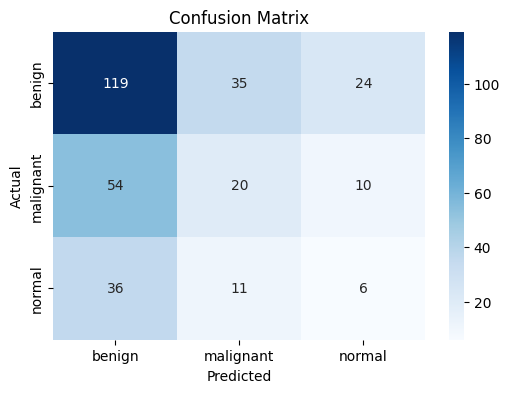

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100
print(f"✅ Final Training Accuracy: {train_acc:.2f}%")
print(f"✅ Final Validation Accuracy: {val_acc:.2f}%")


✅ Final Training Accuracy: 98.34%
✅ Final Validation Accuracy: 72.38%
